# Human Activity Recognition Database


**The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.**

**Description of experiment**  
   
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

In [82]:
import warnings                     # Used to suppress warnings in the output
warnings.filterwarnings("ignore")

import pandas as pd                 # For data manipulation and analysis
import numpy as np                  # For numerical computations and array operations

import matplotlib.pyplot as plt     # For creating static visualizations
import seaborn as sns               # For creating statistical data visualizations

from collections import Counter     # For counting elements in a collection (e.g., class distributions)

from sklearn.decomposition import PCA  # For dimensionality reduction using Principal Component Analysis
from sklearn.manifold import TSNE      # For dimensionality reduction and visualization using t-SNE

from sklearn.model_selection import RandomizedSearchCV  # For hyperparameter tuning using randomized search

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# ***Loading the Data***

In [83]:
train=pd.read_csv(r'C:\Users\DELL\Desktop\Data Science\Human Activity Recognition using Smartphone Data\dataset\train.csv')
test=pd.read_csv(r'C:\Users\DELL\Desktop\Data Science\Human Activity Recognition using Smartphone Data\dataset\test.csv')

In [84]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# **Data Preprocessing**

***Checking for Duplicates***

In [85]:
print('Number of Duplicates in train:',sum(train.duplicated()))
print('Number of Duplicates in test:',sum(train.duplicated()))

Number of Duplicates in train: 0
Number of Duplicates in test: 0


***Checking the Missing Values***

In [86]:
print('Total number of missing values in train: ',train.isna().values.sum())
print('Total number of missing values in test: ',test.isna().values.sum())

Total number of missing values in train:  0
Total number of missing values in test:  0


In [87]:
train.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

***Checking for class imbalance***

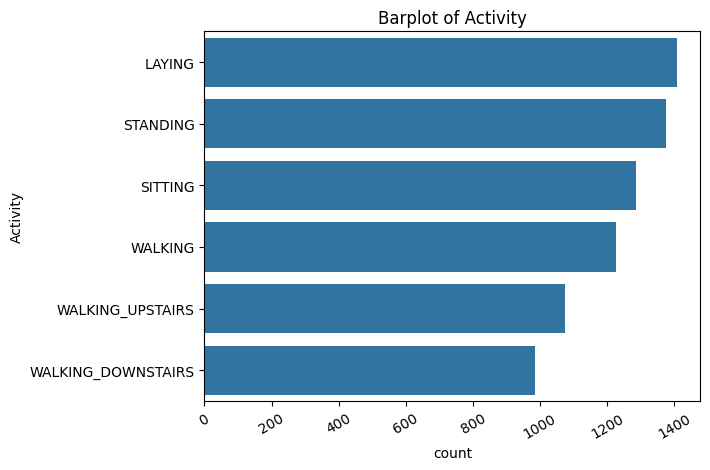

In [88]:
# plt.figure(figsize=(10.8))
plt.title('Barplot of Activity')
sns.countplot(train.Activity,order=train.Activity.value_counts().index)
plt.xticks(rotation=30)
plt.show()

# ***Exploratory Data Analysis***

**What Features are there?**

In [89]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),orient="index").rename(columns={0:'count'}).sort_values('count',ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Text(0.1, 9, 'Dynamic Activities')

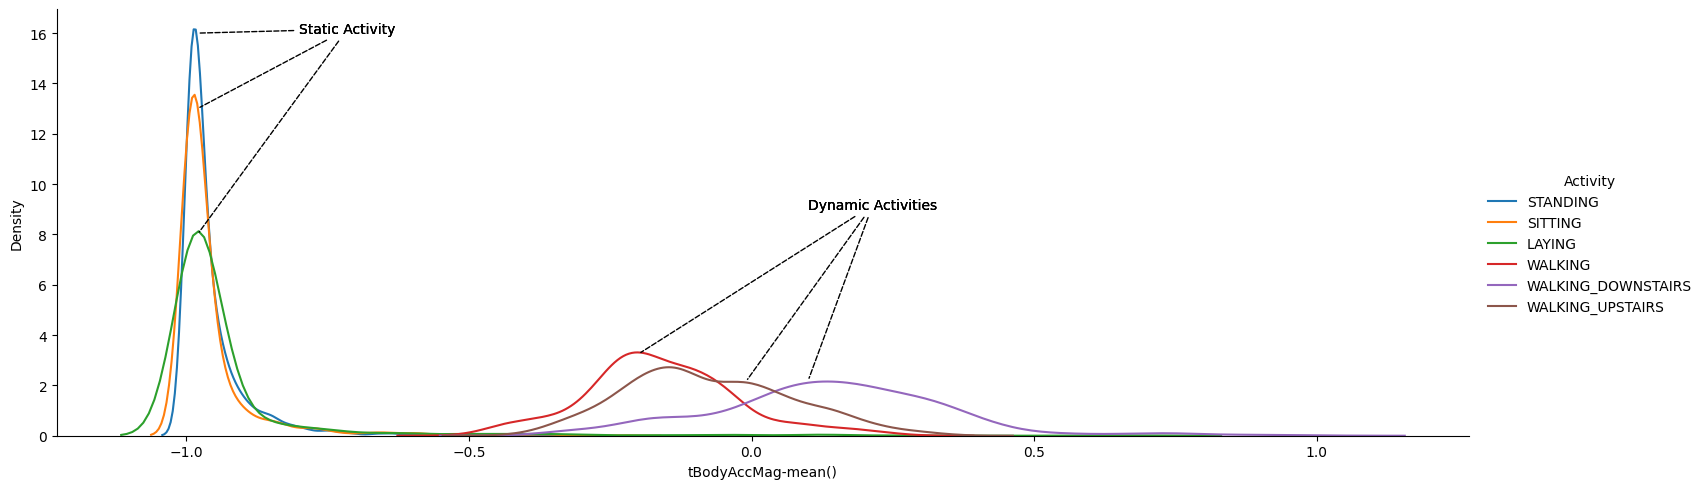

In [90]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 5, aspect = 3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate("Static Activity", xy=(-.98,8), xytext=(-.8,16), arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Static Activity", xy=(-.98,13), xytext=(-.8,16), arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Static Activity", xy=(-.98,16), xytext=(-.8,16), arrowprops={'arrowstyle':'-','ls':'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

<Axes: title={'center': 'Static Activities(Closer View)'}, xlabel='tBodyAccMag-mean()', ylabel='Density'>

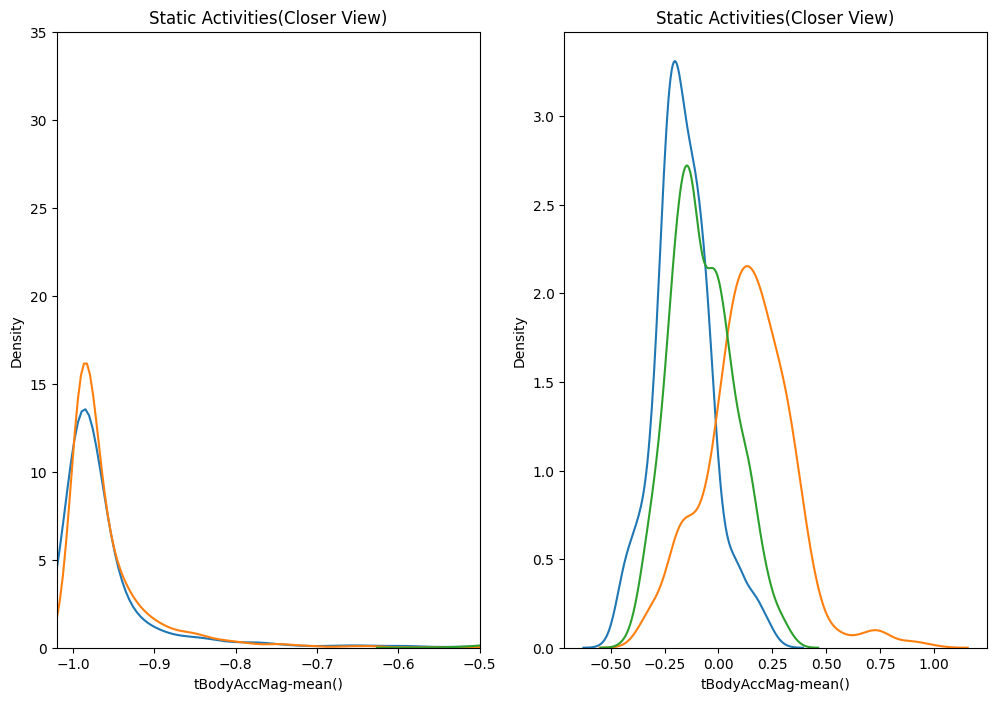

In [91]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(Closer View)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'], hist=False, label='Standing')
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'], hist=False, label='Walking')
plt.axis([-1.02,-0.5,0,35])

plt.subplot(1,2,2)
plt.title("Static Activities(Closer View)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'], hist=False, label='Walking')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'], hist=False, label='Walking')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'], hist=False, label='Walking')
sns.distplot()

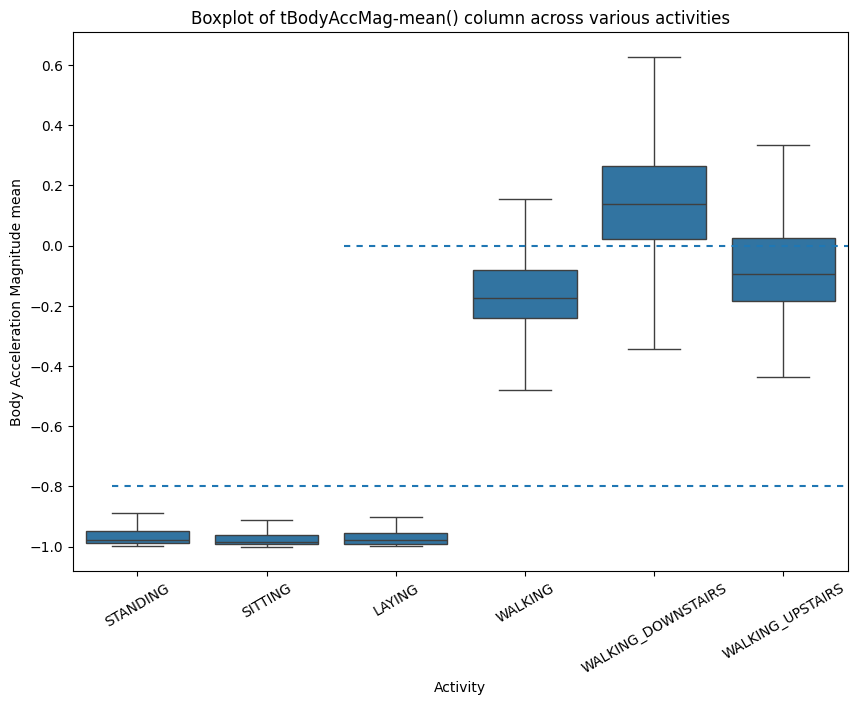

In [92]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity',y="tBodyAccMag-mean()",data=train, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= 0.0, xmin = 0.35, dashes=(3,3))
plt.xticks(rotation=30)
plt.show()

**Analysing Angle between X-axis and gravityMean Feature**

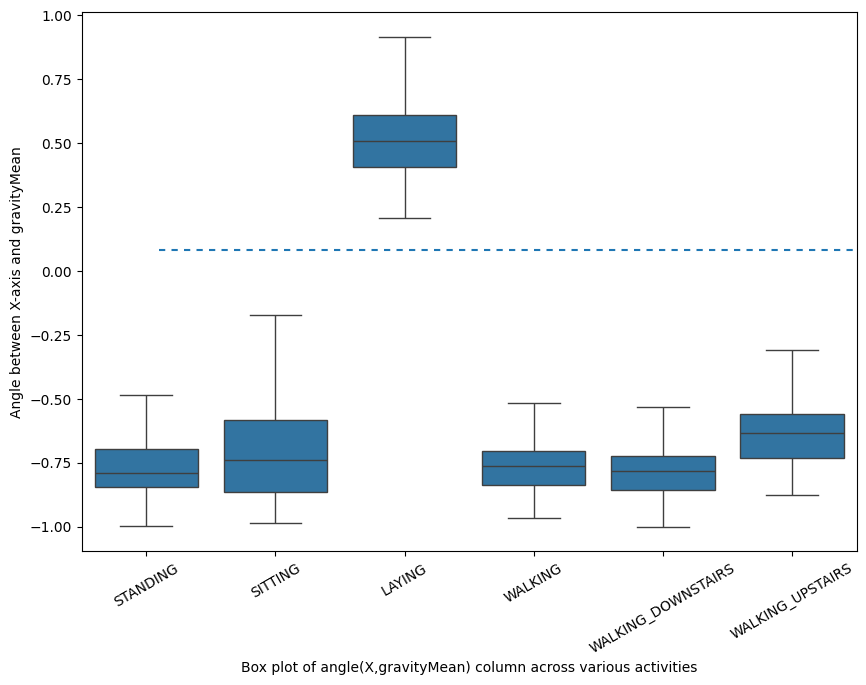

In [93]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.xlabel('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation=30)
plt.show()

**Analysing Angle between Y-axis and gravityMean feature**

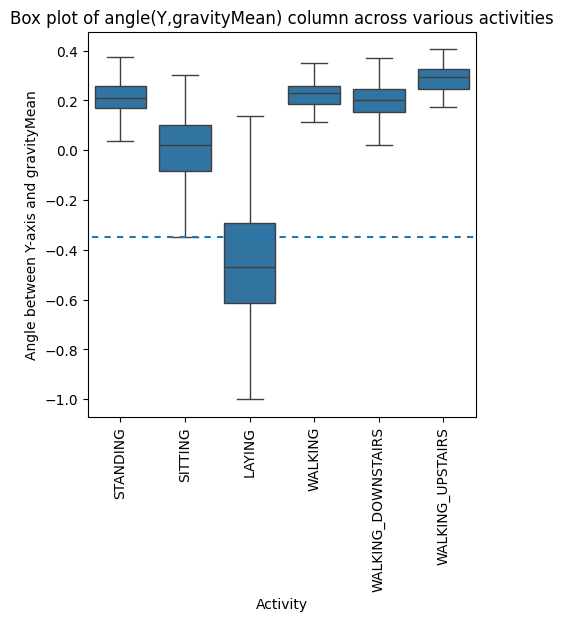

In [94]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data=train,showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))
plt.show()


**Visualizing data using PCA**

Using PCA data can be visualized from a extremely high dimensional space to a low dimensional space and still it retain lots of actual information. Given training data has 561 unique features, using visualize it to 2D space

In [95]:
x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)

In [96]:
pca

array([[-5.5202803 ,  0.29027752],
       [-5.53534954,  0.08253025],
       [-5.47498801, -0.28738705],
       ...,
       [ 5.85750527,  3.08184349],
       [ 5.42109482,  3.42643018],
       [ 5.49797027,  2.78992873]])

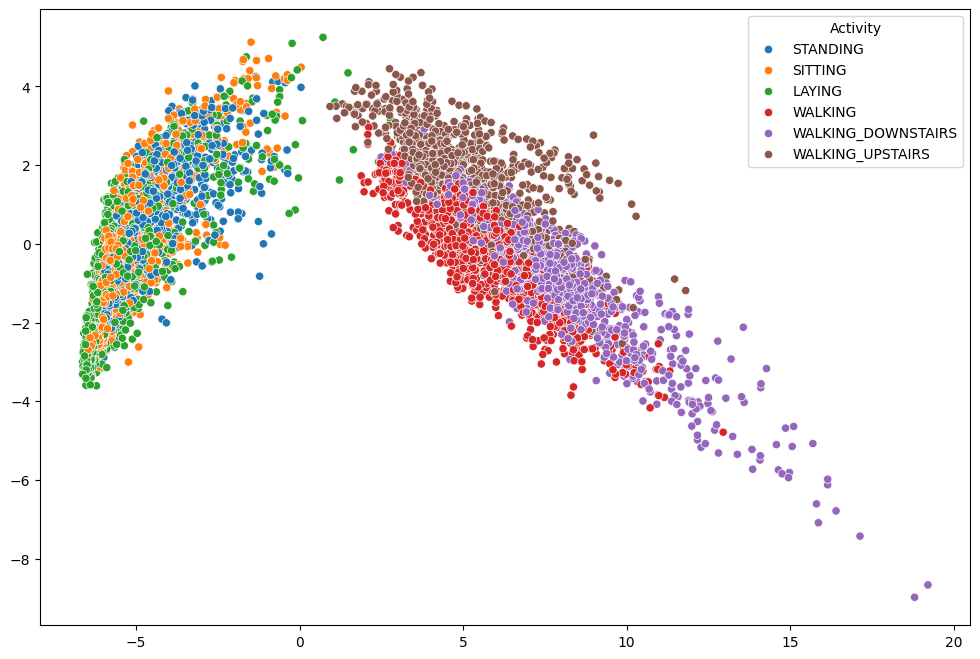

In [97]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train['Activity'])
plt.show()

In [98]:
x_for_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

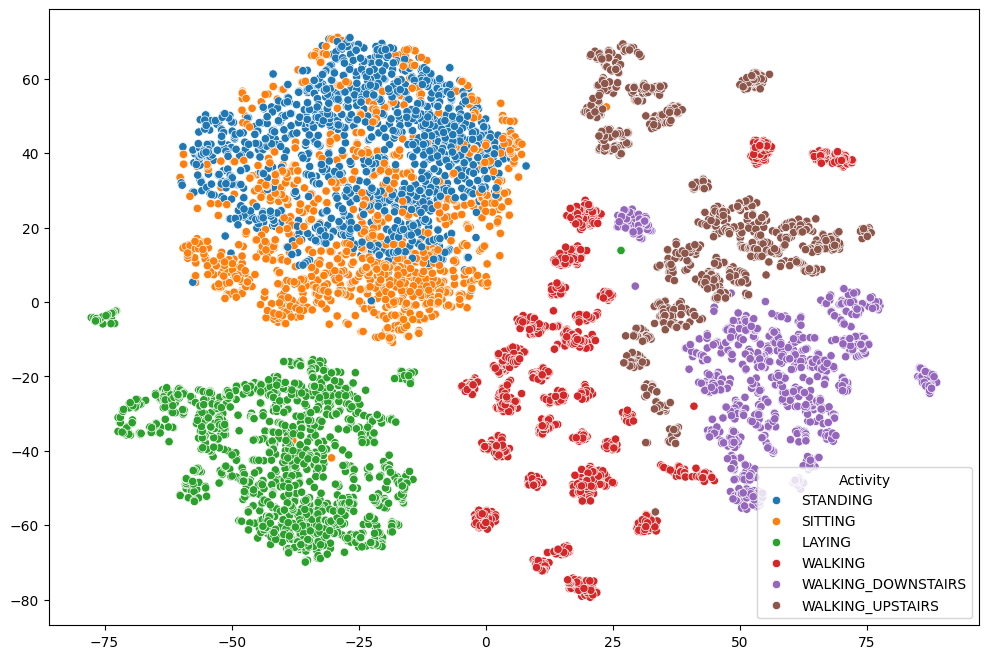

In [99]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = train['Activity'])
plt.show()

# **ML Models**

In [100]:
x_train=train.drop(['Activity','subject'],axis=1)
y_train=train.Activity

x_test=test.drop(['subject','Activity'],axis=1)
y_test=test.Activity

In [101]:
print('Training data size : ', x_train.shape)
print('Test data size : ', x_test.shape)

Training data size :  (7352, 561)
Test data size :  (999, 561)


In [102]:
parameter={"max_iter":[100,200,500]}
lr_classifier=LogisticRegression()
lr_classifier_rs=RandomizedSearchCV(lr_classifier,param_distributions=parameter,cv=5,random_state=42)
lr_classifier_rs.fit(x_train,y_train)
y_pred_lr=lr_classifier_rs.predict(x_test)

In [103]:
lr_accuracy=accuracy_score(y_true=y_test, y_pred=y_pred_lr)
print("Accuracy Using Logestic Regression: ",lr_accuracy)

Accuracy Using Logestic Regression:  0.954954954954955


In [104]:
# lr_classifier=LogisticRegression()
# lr_classifier.fit(x_train,y_train)
# y_pred_lr=lr_classifier.predict(x_test)
# lr_accuracy=accuracy_score(y_true=y_test, y_pred=y_pred_lr)
# print("Accuracy Using Logestic Regression: ",lr_accuracy)

In [105]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [106]:
cm=confusion_matrix(y_test.values,y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   9, 169,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

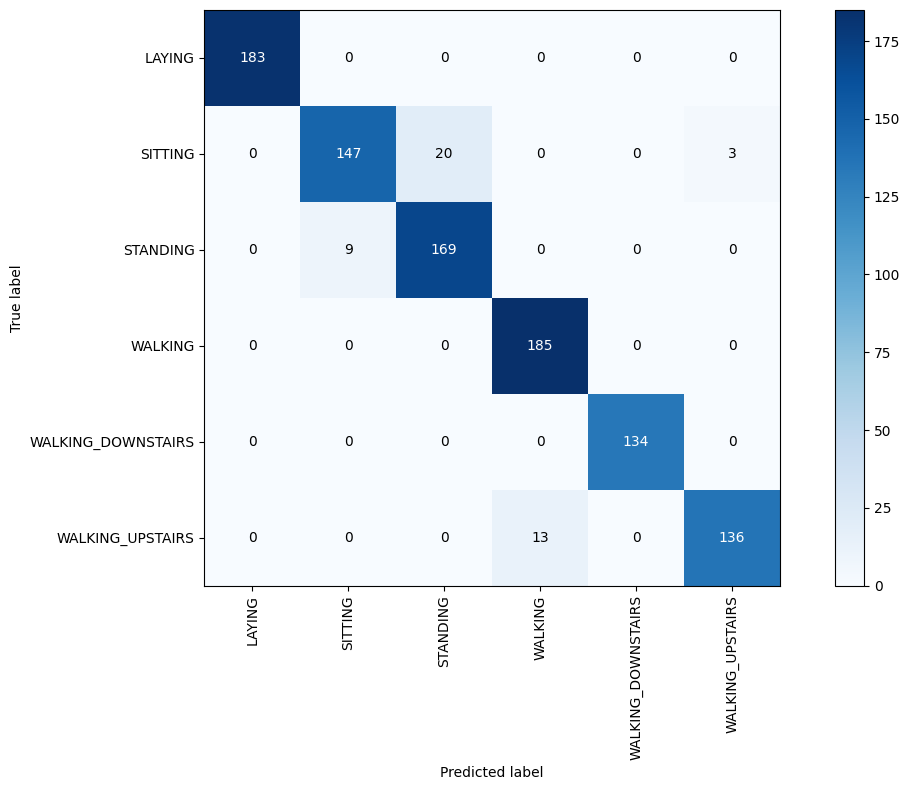

In [107]:
cm = confusion_matrix(y_test.values,y_pred_lr)
plot_confusion_matrix(cm, np.unique(y_pred_lr))

In [108]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
      print("Best estimator: ",model.best_estimator_)
      print("Best set of paramter: ",model.best_params_)

In [109]:
get_best_randomsearch_results(lr_classifier_rs)

Best estimator:  LogisticRegression(max_iter=500)
Best set of paramter:  {'max_iter': 500}


**Kernel SVM model with Hyperparameter tuning and cross validation**

In [111]:
# parameter={
#       'kernal':['linear','rbf','poly','sigmoid'],
#       'C':[100,50]
# }
# svm_rs=RandomizedSearchCV(SVC(),param_distributions=parameter, cv=3, random_state=42)
# svm_rs.fit(x_train,y_train)
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv = 3, random_state=42)
svm_rs.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [112]:
y_pred=svm_rs.predict(x_test)

In [113]:
kernel_svm_accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
print('Accuracy using Kernel SVM: ',kernel_svm_accuracy)

Accuracy using Kernel SVM:  0.965965965965966


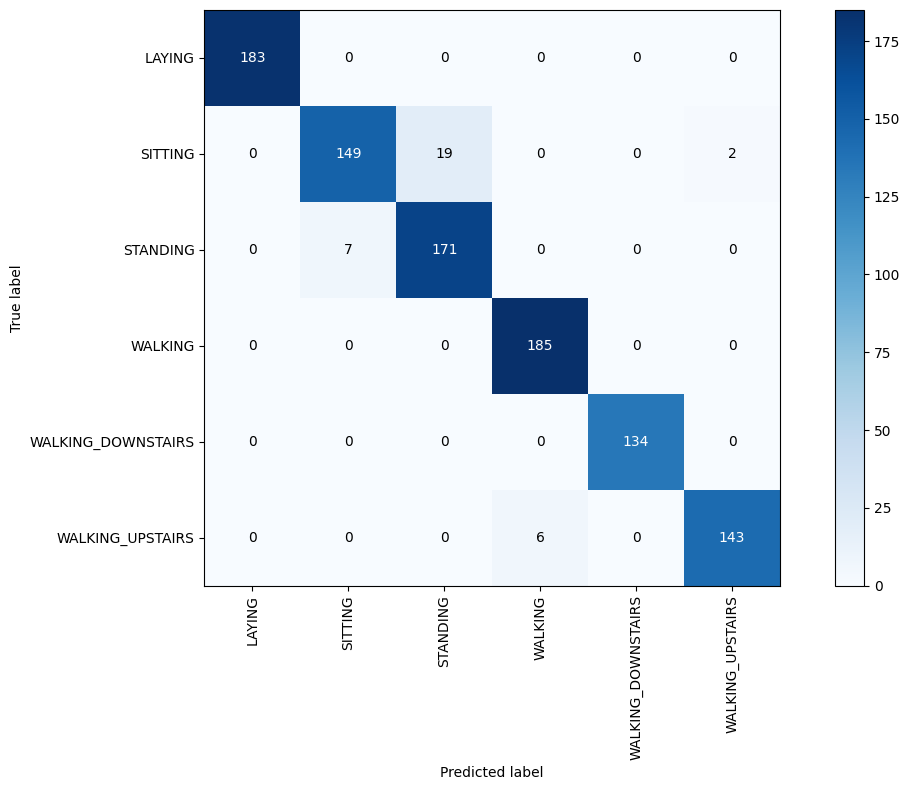

In [114]:
cm=confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))

In [115]:
get_best_randomsearch_results(svm_rs)

Best estimator:  SVC(C=50)
Best set of paramter:  {'kernel': 'rbf', 'C': 50}


**Decision tree model with Hyperparameter tuning and cross validation**

In [119]:
parameters = {'max_depth': np.arange(2, 10, 2)}
dt_classifier=DecisionTreeClassifier()
dt_classifier_rs=RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state=42)
dt_classifier_rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [120]:
y_pred=dt_classifier_rs.predict(x_test)

In [121]:

dt_accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8478478478478478


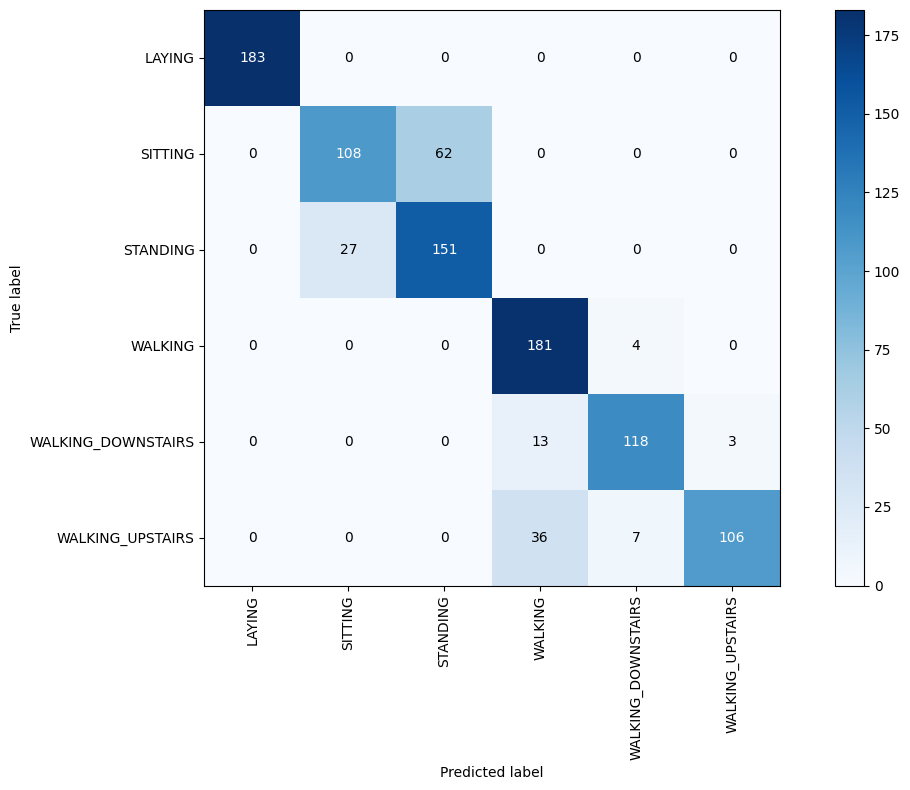

In [122]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [123]:
# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator:  DecisionTreeClassifier(max_depth=8)
Best set of paramter:  {'max_depth': 8}


**Random forest model with Hyperparameter tuning and cross validation**

In [124]:
parameter={
      'n_estimators':np.arange(20,101,10),
      'max_depth':np.arange(2,17,2)
}
rf_classifier=RandomForestClassifier()
rf_classifier_rs=RandomizedSearchCV(rf_classifier,param_distributions=parameter,random_state=42)
rf_classifier_rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [125]:
get_best_randomsearch_results(rf_classifier_rs)

Best estimator:  RandomForestClassifier(max_depth=8, n_estimators=30)
Best set of paramter:  {'n_estimators': 30, 'max_depth': 8}


In [126]:
y_pred=rf_classifier_rs.predict(x_test)

In [127]:
rf_accuracy=accuracy_score(y_pred=y_pred,y_true=y_test)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.9069069069069069


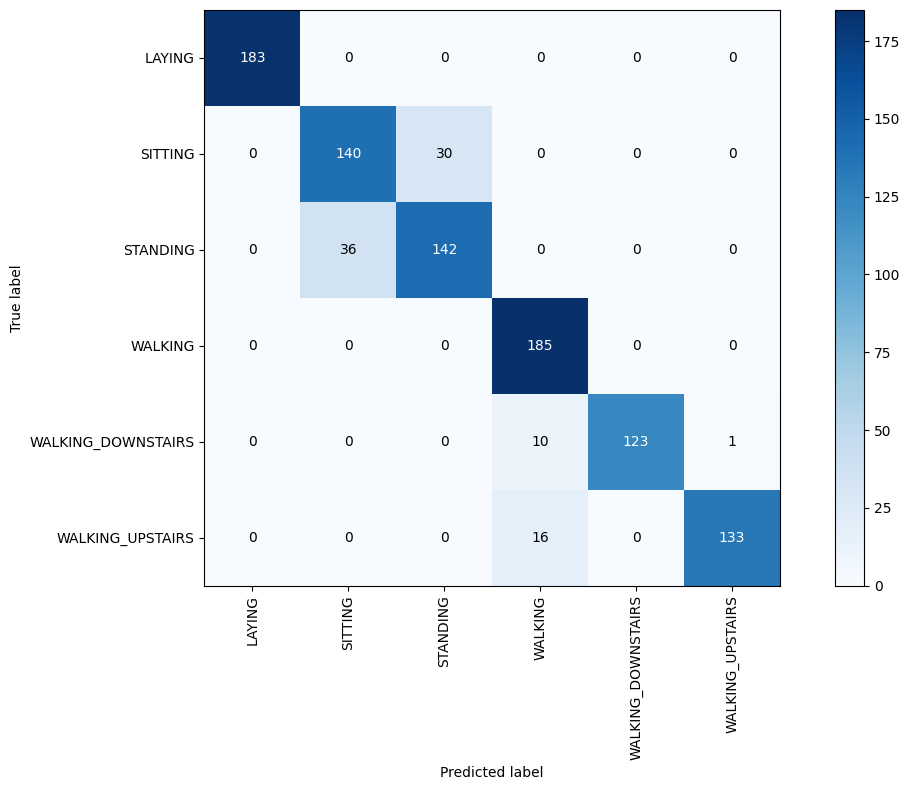

In [128]:
cm=confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))